In [15]:
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use('ggplot')
ds_grid = xr.open_dataset('/home/lisapro/OneDrive/Documents/Projects/from Windows/norfjords_160m_grid_A04.nc')

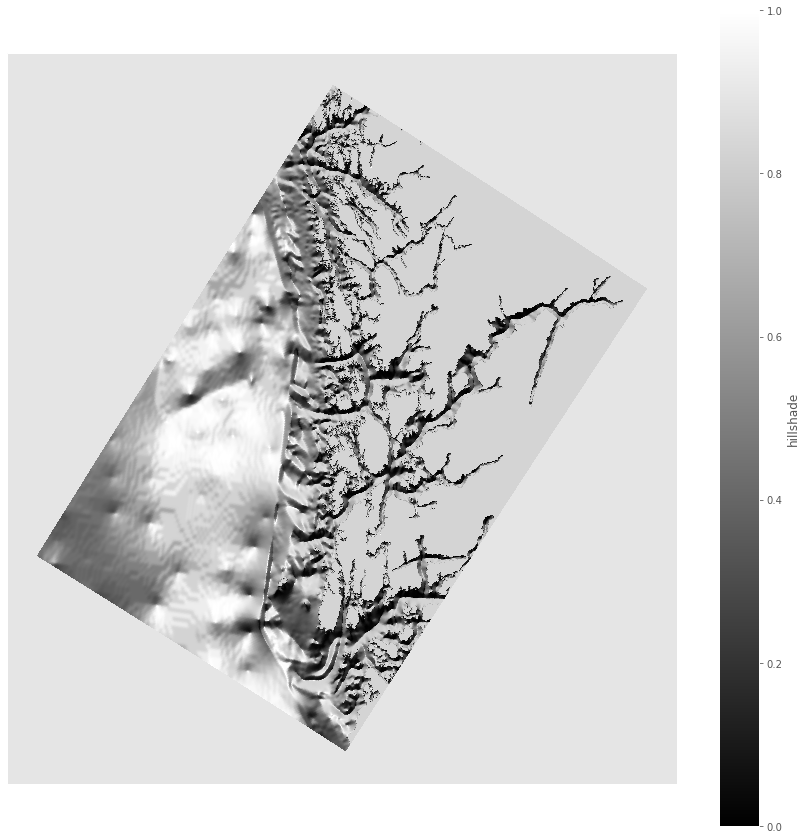

In [19]:
z = ls.hillshade(ds_grid.h.values, vert_exag=5)
ds_grid = ds_grid.assign(hillshade = ds_grid.h*0)
ds_grid = ds_grid.assign(hillshade = ds_grid.hillshade + z)
ds_grid


proj = ccrs.LambertConformal(central_longitude=17, central_latitude=70)
fig = plt.figure(figsize=(15, 15))
#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 9))
#plt.setp(axs.flat, xticks=[], yticks=[])
ax = plt.axes(projection=proj)

ds_grid.hillshade.plot(ax = ax,x='lon_rho', y='lat_rho',cmap='gray',
                                          transform=ccrs.PlateCarree())

#ds_grid.h.plot(ax = axs[1],x='lon_rho', y='lat_rho',
#                                          transform=ccrs.PlateCarree())

#ds_grid.h.plot(x='lon_rho', y='lat_rho',cmap='gray',alpha = 0.5,
#                                          transform=ccrs.PlateCarree(),ax = ax)
#ds_grid.hillshade.plot(x='lon_rho', y='lat_rho',cmap='gray',
#                                          transform=ccrs.PlateCarree())
#coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m', #edgecolor='r', 
#                                        facecolor='y',alpha = 0.1)
#ax.add_feature(coast_10m)

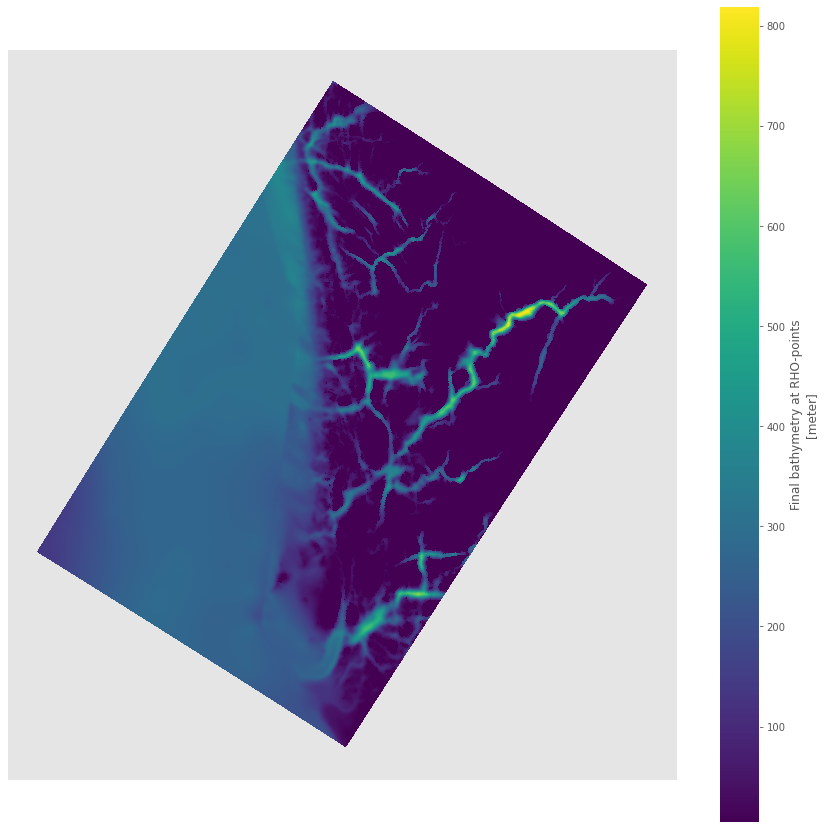

In [20]:
proj = ccrs.LambertConformal(central_longitude=17, central_latitude=70)
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=proj)
ds_grid.h.plot(ax = ax,x='lon_rho', y='lat_rho',transform=ccrs.PlateCarree())

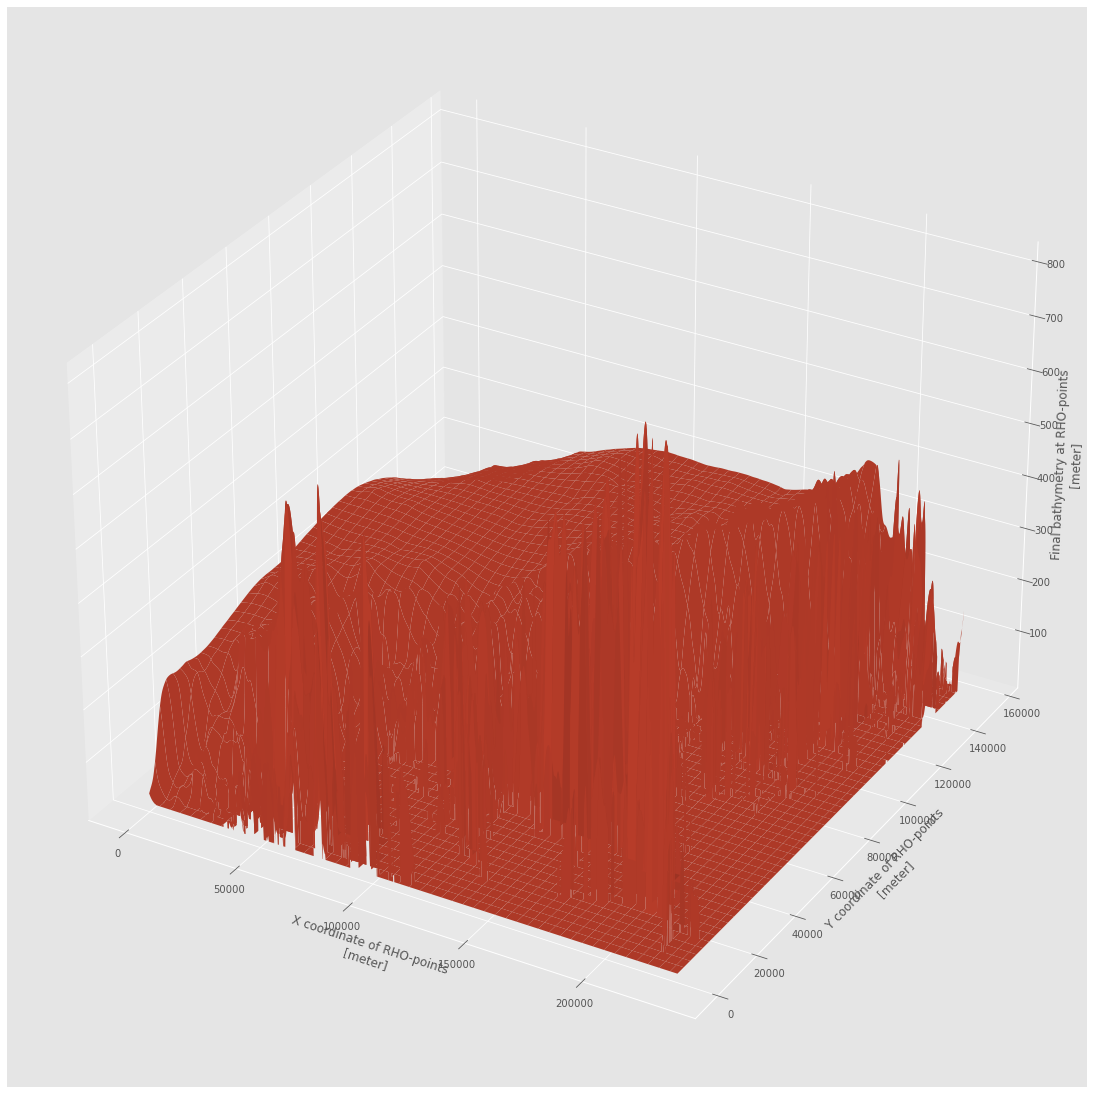

In [25]:
fig = plt.figure(figsize=(15, 15))
ax3d = fig.add_axes([0, 0, 1, 1], projection='3d')
#ax = plt.axes(projection=proj)

ds_grid.h.plot.surface(ax = ax3d)